In [1]:
import os; os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from tqdm.auto import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# import plotly.express as px
from tensorflow.keras import layers
from pickle import dump, load
from pathlib import Path
import plotly.figure_factory as ff
from scipy.spatial import Delaunay
import plotly.graph_objects as go
import plotly.offline as pyo
import chart_studio.plotly as py
from scipy.interpolate import griddata
import os
import wandb
from einops import rearrange
import json
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2

In [39]:
img = Image.open("./Images/Wally.png", 'r')
wally = img.resize((80,156))
img_w, img_h = wally.size

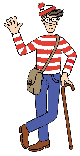

In [40]:
wally

In [46]:
background = Image.new('RGB', (500, 500), (255, 255, 255))
offset = (420,350)
background.paste(wally,offset, wally.convert("RGBA"))

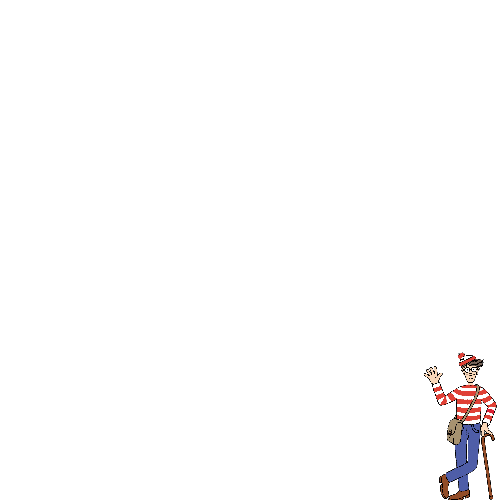

In [47]:
background

In [ ]:
# Y = []
# images = []

# ies = np.linspace(start=0,stop=420,num = 84)
# js = np.linspace(start=0,stop=350,num = 70)

# for i in tqdm(ies):
#     for j in tqdm(js):
#         background = Image.new('RGB', (500, 500), (255, 255, 255))
#         offset = (int(i),int(j))
#         background.paste(wally,offset, wally.convert("RGBA"))
#         background.save(f"./Images/Wally_desp/img_{int(i)+40}_{int(j)+78}.jpg")
#         Y.append([int(i+40),int(j+78)])
#         images.append(f"img_{int(i)+40}_{int(j)+78}.jpg")
    

# data = {'X': images, 'Y': Y}
# df = pd.DataFrame(data=data)
# df.to_csv("Dataset_Wally.csv", index = False)

In [ ]:
# Y = []
# images = []

# ies = np.linspace(start=0,stop=420,num = 84)
# js = np.linspace(start=0,stop=350,num = 70)


# for i in tqdm(ies):
#     for j in tqdm(js):
#         Y.append([i+40,j+78])
#         images.append(f"img_({int(i)}+40)_int({int(j)}+78).jpg")


# data = {'X': images, 'Y': Y}
# df = pd.DataFrame(data=data)
# df.to_csv("Dataset_Wally.csv", index = False)

In [3]:
X = []
Y = []
path = "./Images/Wally_desp/"
data = pd.read_csv("./Datasets/Dataset_Wally.csv")

for image,label in zip(data["X"],data["Y"]):
    img = cv2.imread(path + str(image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255
    X.append(img)

    label = np.array(eval(label))/255
    Y.append(label)


[0.21568627 1.21960784]


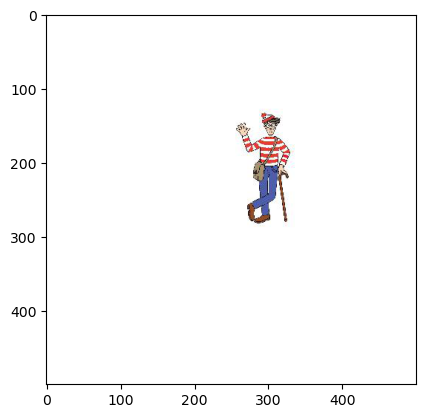

In [11]:
plt.imshow(X[3526])
#plt.axis("off")
print(Y[256])

In [50]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)

In [51]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((3939, 500, 500, 3), (3939, 2), (1941, 500, 500, 3), (1941, 2))

In [56]:
Xtrain[0].shape

(500, 500, 3)

In [58]:
modelo_equiv = tf.keras.models.Sequential([
    layers.Conv2D(32, (7,7), activation = "relu", padding = "same" ,input_shape = Xtrain[0].shape),#56x56
    layers.Flatten(),
    layers.Dense(2, activation  = "sigmoid")
])

In [60]:
modelo_equiv.compile(optimizer="adam", loss ="mse" , metrics=['mae']) #run_eagerly=True: No haga el grafo de operaciones -> Errores más entendibles
history = modelo_equiv.fit(Xtrain, Ytrain, batch_size=32, epochs=120, validation_data = (Xtest, Ytest))

Epoch 1/120
124/124 [==============================] - 171s 1s/step - loss: 0.1956 - mae: 0.3816 - val_loss: 0.1988 - val_mae: 0.3839
Epoch 2/120
124/124 [==============================] - 152s 1s/step - loss: 0.1956 - mae: 0.3816 - val_loss: 0.1988 - val_mae: 0.3839
Epoch 3/120
124/124 [==============================] - 151s 1s/step - loss: 0.1956 - mae: 0.3816 - val_loss: 0.1988 - val_mae: 0.3839
Epoch 4/120
 54/124 [============>.................] - ETA: 1:21 - loss: 0.1911 - mae: 0.3771

KeyboardInterrupt: 